In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import time module
import time

#linear regression
from scipy.stats import linregress

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [7]:
#Create Empty City Data list
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create Counters
record_count = 1
set_count = 1

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#Loop through all the cities in our list
##first try: for i in range(len(cities)):  only gets index, not city name

for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging (if multiple of 50 and greater/equal to 50)
    if (i % 50==0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # create endpoint URL - remove spaces from city name to ensure full name is searched
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    #Run API request
    try:
        #parse the json and retrieve
        city_weather = requests.get(city_url).json()
        #parse data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #covert date
        city_date = city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #append data
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        #if error skip
        
    except:
        print("City not found. Skipping...")
        pass
    
#indicate data is complete
print("----------------------------")
print("Data Retriecal Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lolua
City not found. Skipping...
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | bara
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | goderich
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | lagoa
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | berlevag
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | japura
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 18 of Set 1 | severodvinsk
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | krasnaya zarya
Pr

Processing Record 39 of Set 4 | airai
Processing Record 40 of Set 4 | vostok
Processing Record 41 of Set 4 | baherden
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | bluff
Processing Record 44 of Set 4 | glendive
Processing Record 45 of Set 4 | zerbst
Processing Record 46 of Set 4 | anadyr
Processing Record 47 of Set 4 | ahuimanu
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | thompson
Processing Record 50 of Set 4 | banamba
Processing Record 1 of Set 5 | jasper
Processing Record 2 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 5 | klyuchi
Processing Record 4 of Set 5 | paso de carrasco
Processing Record 5 of Set 5 | chumikan
Processing Record 6 of Set 5 | lang son
Processing Record 7 of Set 5 | maragogi
Processing Record 8 of Set 5 | saleaula
City not found. Skipping...
Processing Record 9 of Set 5 | torbay
Processing Record 10 of Set 5 | loa janan
Processing Record 11 of Set 5 | allentown
Processing Record 12

Processing Record 32 of Set 8 | grindavik
Processing Record 33 of Set 8 | pierre
Processing Record 34 of Set 8 | fernandez
Processing Record 35 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 36 of Set 8 | caravelas
Processing Record 37 of Set 8 | samarai
Processing Record 38 of Set 8 | port-cartier
Processing Record 39 of Set 8 | espelkamp
Processing Record 40 of Set 8 | pueblo nuevo
Processing Record 41 of Set 8 | pirgos
Processing Record 42 of Set 8 | warrington
Processing Record 43 of Set 8 | kuldur
Processing Record 44 of Set 8 | prince rupert
Processing Record 45 of Set 8 | male
Processing Record 46 of Set 8 | okhotsk
Processing Record 47 of Set 8 | bongor
Processing Record 48 of Set 8 | kutum
Processing Record 49 of Set 8 | kopaganj
Processing Record 50 of Set 8 | nanortalik
Processing Record 1 of Set 9 | coquimbo
Processing Record 2 of Set 9 | san juan
Processing Record 3 of Set 9 | acarau
Processing Record 4 of Set 9 | samusu
City not found. Skipping...
Pro

Processing Record 19 of Set 12 | bayir
Processing Record 20 of Set 12 | punta alta
Processing Record 21 of Set 12 | nuuk
Processing Record 22 of Set 12 | ukiah
Processing Record 23 of Set 12 | uaua
Processing Record 24 of Set 12 | canico
Processing Record 25 of Set 12 | zeerust
Processing Record 26 of Set 12 | svetlyy
Processing Record 27 of Set 12 | ossora
Processing Record 28 of Set 12 | zhezkazgan
Processing Record 29 of Set 12 | isangel
Processing Record 30 of Set 12 | bull savanna
Processing Record 31 of Set 12 | balclutha
Processing Record 32 of Set 12 | kungurtug
Processing Record 33 of Set 12 | holalkere
Processing Record 34 of Set 12 | zemio
Processing Record 35 of Set 12 | mehran
Processing Record 36 of Set 12 | jumla
Processing Record 37 of Set 12 | bentiu
Processing Record 38 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 39 of Set 12 | alice springs
Processing Record 40 of Set 12 | dawlatabad
Processing Record 41 of Set 12 | bilma
Processing Record 42 o

In [8]:
# Get json data in try except block so know if anything fails

len(city_data)

564

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kurilsk,50.6789,156.1250,46.58,62,21,13.80,RU,2021-05-24 01:24:04
1,Bara,10.3744,10.7288,82.54,58,47,5.19,NG,2021-05-24 01:24:04
2,Hamilton,39.1834,-84.5333,80.04,74,90,2.93,US,2021-05-24 01:21:16
3,Bethel,41.3712,-73.4140,75.81,60,20,13.80,US,2021-05-24 01:24:05
4,Albany,42.6001,-73.9662,63.30,67,96,9.35,US,2021-05-24 01:24:05
5,Goderich,43.7501,-81.7165,61.12,59,100,10.36,CA,2021-05-24 01:24:06
6,Mataura,-46.1927,168.8643,49.48,73,31,1.99,NZ,2021-05-24 01:24:06
7,Jamestown,42.0970,-79.2353,70.92,88,90,9.22,US,2021-05-24 01:23:26
8,Lagoa,39.0500,-27.9833,60.42,65,100,8.05,PT,2021-05-24 01:24:06
9,Rikitea,-23.1203,-134.9692,75.04,73,37,4.07,PF,2021-05-24 01:24:07


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df=city_data_df[new_column_order]

city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2021-05-24 01:24:04,50.6789,156.1250,46.58,62,21,13.80
1,Bara,NG,2021-05-24 01:24:04,10.3744,10.7288,82.54,58,47,5.19
2,Hamilton,US,2021-05-24 01:21:16,39.1834,-84.5333,80.04,74,90,2.93
3,Bethel,US,2021-05-24 01:24:05,41.3712,-73.4140,75.81,60,20,13.80
4,Albany,US,2021-05-24 01:24:05,42.6001,-73.9662,63.30,67,96,9.35


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

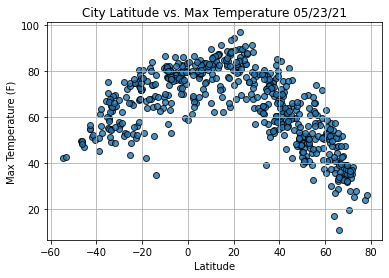

In [13]:


# Build the scatter plot

plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
plt.savefig("Weather_data/Fig1.png")

#show
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

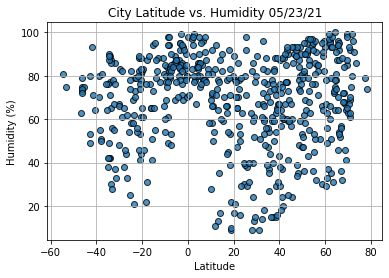

In [14]:
# Build the scatter plot

plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
plt.savefig("Weather_data/Fig2.png")

#show
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

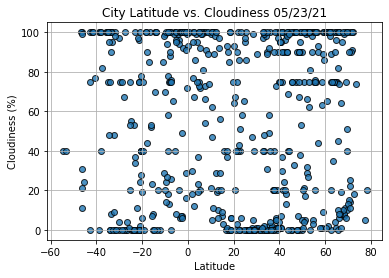

In [15]:
# Build the scatter plot

plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
plt.savefig("Weather_data/Fig3.png")

#show
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

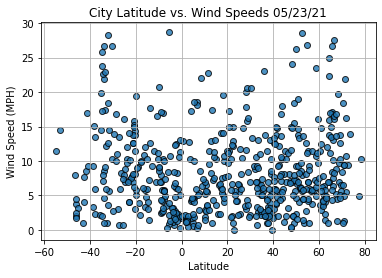

In [16]:
# Build the scatter plot

plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Graph properties
plt.title(f"City Latitude vs. Wind Speeds "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
plt.savefig("Weather_data/Fig4.png")

#show
plt.show

In [63]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"R-value = {r_value:.3f}")

In [25]:
index13 = city_data_df.loc[13]
index13

City                      Qaanaaq
Country                        GL
Date          2021-05-24 01:24:08
Lat                        77.484
Lng                      -69.3632
Max Temp                    23.95
Humidity                       79
Cloudiness                      5
Wind Speed                    4.9
Name: 13, dtype: object

In [26]:
#Create North south hemisphere data
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]


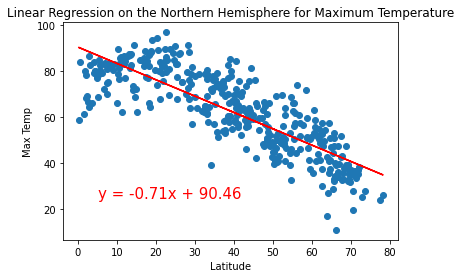

R-value = -0.826


In [64]:
# Apply regression function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp', (5,25))



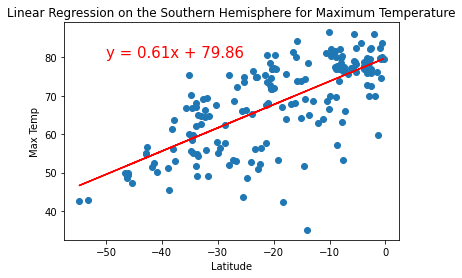

R-value = 0.710


In [65]:
# Apply regression function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp', (-50,80))

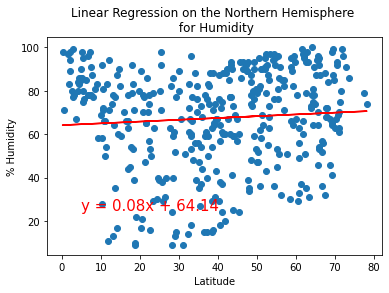

R-value = 0.074


In [69]:
# Apply regression function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#call function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Humidity', 
                       '% Humidity', (5,25))

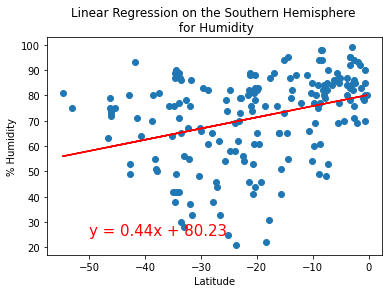

R-value = 0.343


In [71]:
# Apply regression function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#call function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Humidity', 
                       '% Humidity', (-50,25))

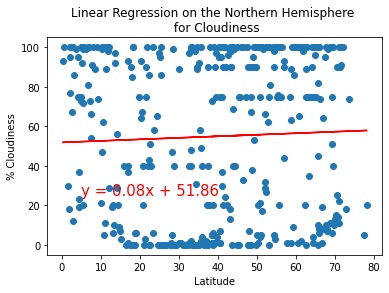

R-value = 0.039


In [72]:
# Apply regression function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', 
                       '% Cloudiness', (5,25))

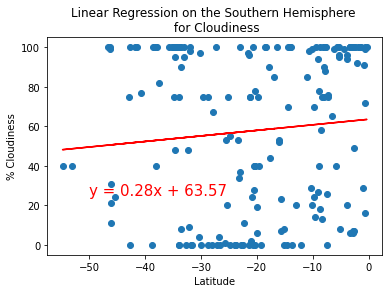

R-value = 0.094


In [73]:
# Apply regression function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#call function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness', 
                       '% Cloudiness', (-50,25))

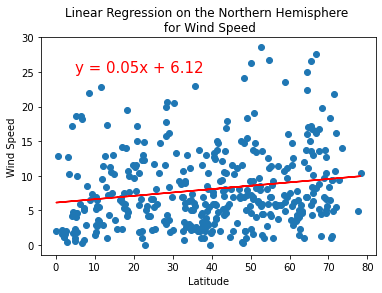

R-value = 0.176


In [74]:
# Apply regression function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#call function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (5,25))

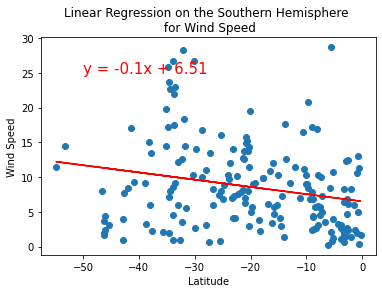

R-value = -0.229


In [75]:
# Apply regression function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#call function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (-50,25))